In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

**4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.**

In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


**5. How many rows and columns are in `gdp_df`? What are the data types of each column?**

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
Country or Area    7662 non-null object
Year               7662 non-null int64
Value              7662 non-null float64
Value Footnotes    0 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


There are 7662 rows and 4 columns (Country as object, Year as int, and Value/Value Footnotes as floats)

**6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.**

In [6]:
#Drop the Value Footnotes column
gdp_df=gdp_df.drop('Value Footnotes', axis=1)

In [7]:
gdp_df=gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [8]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


**7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?**

In [9]:
len(pd.unique(gdp_df['Country']))

242

In [10]:
grouped=gdp_df.groupby('Country')['Year'].count().sort_values()
print(grouped.to_string())

Country
Djibouti                                              10
Somalia                                               10
Turks and Caicos Islands                              12
Sint Maarten (Dutch part)                             14
Kosovo                                                15
Cayman Islands                                        16
Nauru                                                 19
Afghanistan                                           20
CuraÃ§ao                                              22
Palau                                                 22
SÃ£o TomÃ© and Principe                               22
Qatar                                                 23
Other small states                                    23
Timor-Leste                                           23
Liberia                                               23
Libya                                                 24
San Marino                                            25
Small states           

In [11]:
grouped_reset=grouped.reset_index()
print(len(grouped_reset[grouped_reset['Year']!=33]))

40


There are 40 countries that have missing years (ie: less than 33 counts)

**8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?**

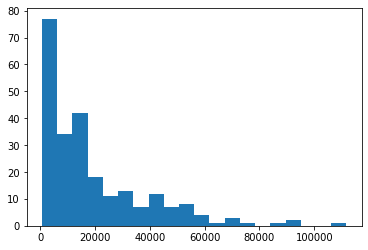

In [12]:
gdp_2020_df= gdp_df[gdp_df['Year']==2020]

plt.hist(gdp_2020_df['GDP_Per_Capita'], bins=20)
plt.show()

In [13]:
gdp_2020_df

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


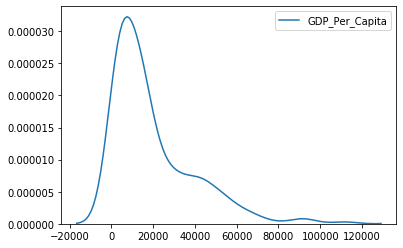

In [14]:
sns.kdeplot(gdp_2020_df['GDP_Per_Capita'])


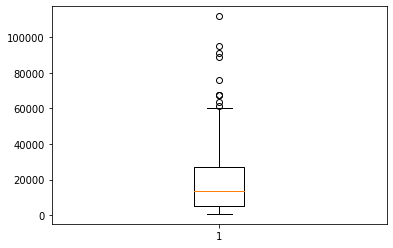

In [15]:
plt.boxplot(gdp_2020_df['GDP_Per_Capita'])
plt.show()

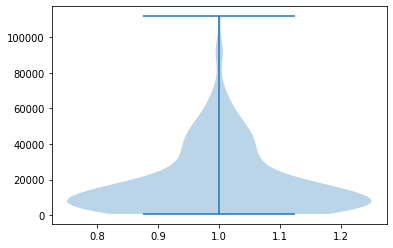

In [16]:
plt.violinplot(gdp_2020_df['GDP_Per_Capita'])
plt.show()

**9. What was the median GDP per capita value in 2020?**

In [17]:
gdp_2020_df.median()

Year               2020.000000
GDP_Per_Capita    13357.997573
dtype: float64

The median 2020 GDP is $13,357.99

**10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots**

In [18]:
gdp_decades= gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
11                    Afghanistan  2010     2026.163818
22    Africa Eastern and Southern  2020     3455.023119
32    Africa Eastern and Southern  2010     3513.315920
42    Africa Eastern and Southern  2000     2897.140841
...                           ...   ...             ...
7628                       Zambia  1990     2290.039226
7631                     Zimbabwe  2020     1990.319419
7641                     Zimbabwe  2010     1799.540233
7651                     Zimbabwe  2000     2750.601236
7661                     Zimbabwe  1990     2704.757299

[921 rows x 3 columns]


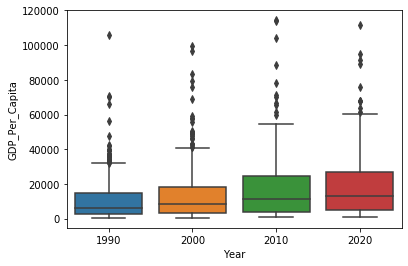

In [19]:
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

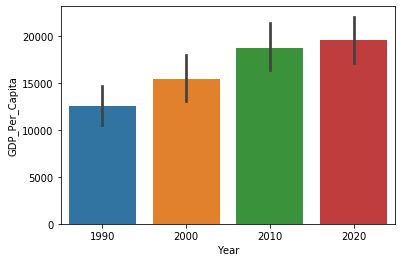

In [20]:
sns.barplot(x='Year',y='GDP_Per_Capita', data=gdp_decades)

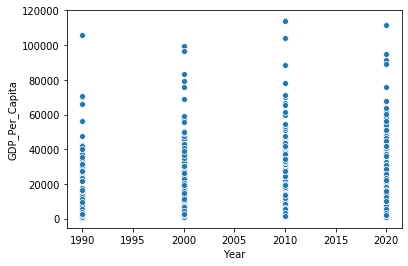

In [21]:
sns.scatterplot(x='Year',y='GDP_Per_Capita', data=gdp_decades)

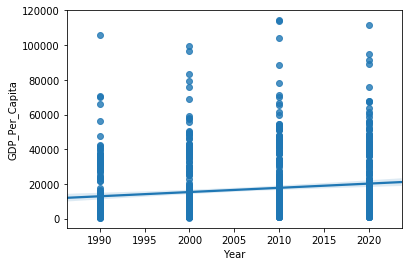

In [22]:
sns.regplot(x='Year',y='GDP_Per_Capita', data=gdp_decades)

GDP has steadily increased over time.  Scatterplots aren't very useful here (except for the regression line),
boxplots and barplots are more effective for this type of visualization, particularly boxplots with the ability
to see how the range of distributions have changed over time as well.

**11. Which country was the first to have a GDP per capita greater than $100,000?**

In [23]:
sorted_df=gdp_df.sort_values(by=['Year','GDP_Per_Capita'])
index=sorted_df.loc[sorted_df['GDP_Per_Capita']>=100000].iloc[0]
print(index)

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita                  105894
Name: 7302, dtype: object


United Arab Emirites was the first to exceed $100,000, in 1990

**12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.**

In [24]:
gdp_2020_df.nlargest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


Luxembourg had the max GDP in 2020

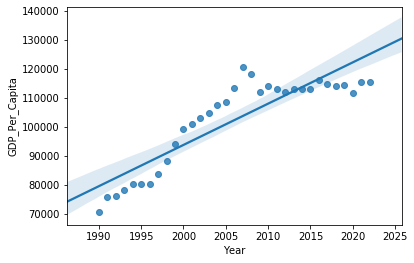

In [25]:
gdp_lux=gdp_df[gdp_df['Country']=='Luxembourg']
sns.regplot(x='Year',y='GDP_Per_Capita', data=gdp_lux)

**13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.**

In [26]:
gdp_2020_df.nsmallest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


Burundi had the lowest GDP in 2020

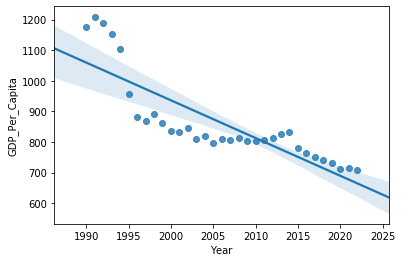

In [27]:
gdp_bur=gdp_df[gdp_df['Country']=='Burundi']
sns.regplot(x='Year',y='GDP_Per_Capita', data=gdp_bur)

Burundi has seen a decrease in GDP since 1991, slight increase from 2010-2014

**14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.**

In [28]:
internet_df=pd.read_csv('../data/internet_use.csv',usecols=[0,1,2,3],nrows=6083)
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [29]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


**15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.**

In [30]:
internet_df=internet_df.drop('Value Footnotes', axis=1)

In [31]:
internet_df=internet_df.rename(columns={'Country or Area':'Country','Value':'Internet_Users_Pct'})

In [32]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


**16. Look at the number of observations in this dataset per year. What do you notice?**

In [33]:
grouped_internet=internet_df.groupby('Year')['Internet_Users_Pct'].count()
print(grouped_internet.to_string())

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11


High occurences in 1990, with an unnatural dip in 1991-1994.  Counts level out after 2000

**17. What is the first year to have a non-zero internet users percentage value?**

In [34]:
sorted_df2=internet_df.sort_values(by=['Year','Internet_Users_Pct'])
index2=sorted_df2.loc[sorted_df2['Internet_Users_Pct']>0].iloc[0]
print(index2)

Country                  Belgium
Year                        1990
Internet_Users_Pct    0.00100674
Name: 543, dtype: object


1990 was the first year 

**18. How does the distribution of internet users percent differ for 2000 and 2014?**

In [35]:
internet_2000_2014= internet_df[internet_df['Year'].isin([2000,2014])]

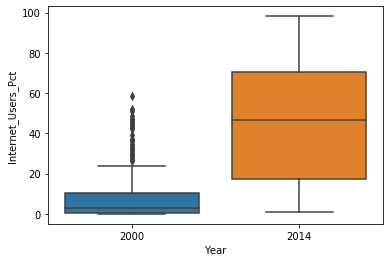

In [36]:
sns.boxplot(x='Year',y='Internet_Users_Pct', data=internet_2000_2014)

Median percentage was significantly higher in 2014

**19. For how many countries was the percentage of internet users below 5% in 2014?**

In [37]:
internet_2014= internet_df[internet_df['Year']==2014]
print(internet_2014)

                  Country  Year  Internet_Users_Pct
5             Afghanistan  2014              7.0000
28                Albania  2014             54.3000
57                Algeria  2014             29.5000
87                Andorra  2014             86.1000
114                Angola  2014             21.3623
...                   ...   ...                 ...
5937             Viet Nam  2014             41.0000
5960  Virgin Islands (US)  2014             50.0700
6003                Yemen  2014             22.5500
6031               Zambia  2014              6.5000
6061             Zimbabwe  2014             16.3647

[204 rows x 3 columns]


In [38]:
internet_2014_filter= internet_2014[internet_2014['Internet_Users_Pct']<5]
print(len(internet_2014_filter))

10


Only 10 countries had percentages lower than 5% in 2014

**20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.**

In [39]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df, on=['Country','Year'], how='outer')
print(gdp_and_internet_use.to_string())

                                                Country  Year  GDP_Per_Capita  Internet_Users_Pct
0                                           Afghanistan  2021     1517.016266                 NaN
1                                           Afghanistan  2020     1968.341002                 NaN
2                                           Afghanistan  2019     2079.921861           17.600000
3                                           Afghanistan  2018     2060.698973           16.800000
4                                           Afghanistan  2017     2096.093111           13.500000
5                                           Afghanistan  2016     2101.422187           11.000000
6                                           Afghanistan  2015     2108.714173            8.260000
7                                           Afghanistan  2014     2144.449634            7.000000
8                                           Afghanistan  2013     2165.340915            5.900000
9                   

**21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?**

In [40]:
gdp_and_internet_use_2014= gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values(by='Internet_Users_Pct',ascending=False)
print(gdp_and_internet_use_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
2993                      Iceland  2014    50450.741612             98.1580
8131  Falkland (Malvinas) Islands  2014             NaN             97.6000
687                       Bermuda  2014    77361.104881             96.8000
5212                       Norway  2014    62838.515727             96.3005
1669                      Denmark  2014    52048.335493             95.9935
...                           ...   ...             ...                 ...
6949                   The Gambia  2014     1885.142034                 NaN
7167     Turks and Caicos Islands  2014    24661.145053                 NaN
7377          Upper middle income  2014    14063.487284                 NaN
7542           West Bank and Gaza  2014     5967.073437                 NaN
7571                        World  2014    15120.730322                 NaN

[284 rows x 4 columns]


Iceland, Falkland (Malvinas) Islands,and Bermuda had the highest internet user percentages in 2014

In [41]:
high_internet=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland', 'Falkland (Malvinas) Islands','Bermuda'])]
print(high_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
679   Bermuda  2022    81165.650944                 NaN
680   Bermuda  2021    78570.489515                 NaN
681   Bermuda  2020    76117.804744                 NaN
682   Bermuda  2019    81681.726668                 NaN
683   Bermuda  2018    81423.408453                 NaN
...       ...   ...             ...                 ...
8341  Iceland  1994             NaN            6.794810
8342  Iceland  1993             NaN            2.667830
8343  Iceland  1992             NaN            1.539160
8344  Iceland  1991             NaN            0.505129
8345  Iceland  1990             NaN            0.000000

[89 rows x 4 columns]


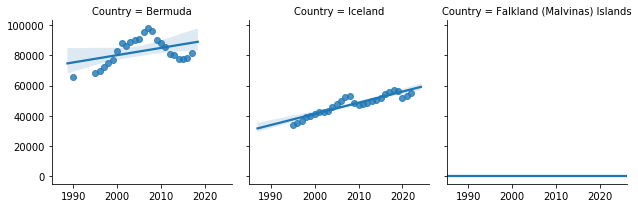

In [42]:
g = sns.FacetGrid(high_internet, col='Country')
g.map_dataframe(sns.regplot, x='Year',y='GDP_Per_Capita')

Both Bermuda and Iceland saw decent increases in GDP around 2008/2009 (both increasing steadily on average). The Falkland Islands have no recorded GDP for any years in the dataset (missing data?)

**22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.**

(See above for the 2014 dataframe)

**23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.**

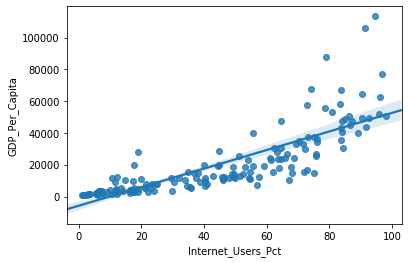

In [43]:
sns.regplot(x='Internet_Users_Pct',y='GDP_Per_Capita',data=gdp_and_internet_use_2014)

Generally, as internet usage increases, GDP also increases, there's a positive correlation present.